# import and data

In [3]:
import pandas as pd
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/


Mounted at /content/drive
/content/drive/MyDrive


In [5]:
# path
path= "./_効果検証入門/input/Cigar_California.csv"
data= pd.read_csv(path) 

'/content/drive/MyDrive'

In [48]:
# data check
data[data["state"]==1].head(3)

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1
1,1,64,29.8,3431.0,2276.7,31.0,1684.073202,95.4,27.5
2,1,65,29.8,3486.0,2327.5,31.5,1809.841875,98.5,28.9


In [11]:
skip_state = [3,9,10,22,21,23,31,33,48]

In [12]:
Cigar = data[(~data["state"].isin(skip_state) ) & (data["year"] >= 70)] #1970年以降の対象の州
Cigar["area"] = Cigar["state"].apply(lambda x: "CA" if x == 5 else "Rest of USA")
Cigar

<ipython-input-12-5d35b4cf018d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cigar["area"] = Cigar["state"].apply(lambda x: "CA" if x == 5 else "Rest of USA")


,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area
7,1,70,39.6,3444.0,2394.6,38.8,2591.039159,89.8,34.3,Rest of USA
8,1,71,42.7,3481.0,2443.5,40.5,2785.315971,95.4,35.8,Rest of USA
9,1,72,42.3,3511.0,2484.7,41.8,3034.808297,101.1,37.4,Rest of USA
10,1,73,42.1,3540.0,2526.0,44.4,3387.574086,102.9,37.3,Rest of USA
11,1,74,43.1,3574.0,2573.9,49.3,3718.867175,108.2,41.4,Rest of USA
...,...,...,...,...,...,...,...,...,...,...
1375,51,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3,Rest of USA
1376,51,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0,Rest of USA
1377,51,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9,Rest of USA
1378,51,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6,Rest of USA


In [50]:
display(Cigar[Cigar["area"]=="CA"].head(2))
display(Cigar[Cigar["area"]=="CA"].tail(2))

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area,post,ca,year_dummy
97,5,70,38.8,19953.0,14317.6,38.8,4192.781105,123.0,37.1,CA,0,1,D_70
98,5,71,39.7,20266.0,14670.5,40.5,4414.306911,121.0,38.5,CA,0,1,D_71


,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area,post,ca,year_dummy
118,5,91,186.8,30218.8,22694.0,136.2,17705.0,68.7,151.4,CA,1,1,D_91
119,5,92,201.9,30703.3,22920.0,140.3,18495.0,67.5,165.7,CA,1,1,D_92


In [14]:
#介入の前後で分ける（介入が88年）
before_years  = list(range(70, 88))  # 1977-1987
after_years   = list(range(88, 94))  # 1987-1993

In [15]:
CA_before = Cigar[ (Cigar["area"] == "CA") & (Cigar["year"].isin(before_years)) ]
CA_after  = Cigar[ (Cigar["area"] == "CA") & (Cigar["year"].isin(after_years)) ]

Rest_before  = Cigar[ (Cigar["area"] == "Rest of USA") & (Cigar["year"].isin(before_years)) ]
Rest_after   = Cigar[ (Cigar["area"] == "Rest of USA") & (Cigar["year"].isin(after_years)) ]

In [16]:
# compare the sales before and after the Proposition99
# CA
print(CA_before["sales"].mean())
print(CA_after["sales"].mean())
# Rest of USA
print(Rest_before["sales"].mean())
print(Rest_after["sales"].mean())

117.66111111111111
77.3
129.96311728395062
107.12333333333333


In [17]:
Cigar["post"]  = Cigar["year"].apply(lambda x: 1 if x>87 else 0)
Cigar["ca"]    = Cigar["state"].apply(lambda x: 1 if x==5 else 0)
Cigar["state"] = Cigar["state"].astype(str) # int->str(category)
Cigar["year_dummy"]  = Cigar["year"].apply(lambda x: f"D_{x}")

Cigar

<ipython-input-17-83a512d6eef5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cigar["post"]  = Cigar["year"].apply(lambda x: 1 if x>87 else 0)
<ipython-input-17-83a512d6eef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cigar["ca"]    = Cigar["state"].apply(lambda x: 1 if x==5 else 0)
<ipython-input-17-83a512d6eef5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area,post,ca,year_dummy
7,1,70,39.6,3444.0,2394.6,38.8,2591.039159,89.8,34.3,Rest of USA,0,0,D_70
8,1,71,42.7,3481.0,2443.5,40.5,2785.315971,95.4,35.8,Rest of USA,0,0,D_71
9,1,72,42.3,3511.0,2484.7,41.8,3034.808297,101.1,37.4,Rest of USA,0,0,D_72
10,1,73,42.1,3540.0,2526.0,44.4,3387.574086,102.9,37.3,Rest of USA,0,0,D_73
11,1,74,43.1,3574.0,2573.9,49.3,3718.867175,108.2,41.4,Rest of USA,0,0,D_74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,51,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3,Rest of USA,1,0,D_88
1376,51,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0,Rest of USA,1,0,D_89
1377,51,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9,Rest of USA,1,0,D_90
1378,51,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6,Rest of USA,1,0,D_91


In [18]:
# Cigar_dis_sumは、
Cigar_dis_sum = Cigar.groupby(["post","year","year_dummy","ca"])["sales","pop16"].apply(lambda x: (x['sales']*x['pop16']).sum()/x['pop16'].sum())
Cigar_dis_sum = Cigar_dis_sum.reset_index()
Cigar_dis_sum["confounding_ca_post"]  = Cigar_dis_sum["ca"]*Cigar_dis_sum["post"]
Cigar_dis_sum.columns.values[4] = "sales"
Cigar_dis_sum

<ipython-input-18-54c2d37a1310>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cigar_dis_sum = Cigar.groupby(["post","year","year_dummy","ca"])["sales","pop16"].apply(lambda x: (x['sales']*x['pop16']).sum()/x['pop16'].sum())


,post,year,year_dummy,ca,sales,confounding_ca_post
0,0,70,D_70,0,115.033284,0
1,0,70,D_70,1,123.000000,0
2,0,71,D_71,0,118.117568,0
3,0,71,D_71,1,121.000000,0
4,0,72,D_72,0,120.857179,0
5,0,72,D_72,1,123.500000,0
6,0,73,D_73,0,122.819500,0
7,0,73,D_73,1,124.400000,0
8,0,74,D_74,0,126.940448,0
9,0,74,D_74,1,126.700000,0


# Regression Analysis

### non log

In [19]:
X = Cigar_dis_sum[['ca', 'post', 'confounding_ca_post','year_dummy']]
X = pd.get_dummies(X, drop_first=True)

In [115]:
# define your independent and dependent variables
X = Cigar_dis_sum[['ca', 'post', 'confounding_ca_post','year_dummy']]
X = pd.get_dummies(X, drop_first=True)

Y = Cigar_dis_sum['sales']

# add an intercept to the independent variables
X = sm.add_constant(X)

# create a linear regression model and fit it to the data
model = sm.OLS(Y, X).fit()

# print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     13.13
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           5.98e-08
Time:                        17:08:38   Log-Likelihood:                -131.32
No. Observations:                  46   AIC:                             312.6
Df Residuals:                      21   BIC:                             358.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 123.5615    

In [ ]:
rest_sales = Cigar_dis_sum[ (Cigar_dis_sum["ca"]==0) ]["sales"]
ca_sales = Cigar_dis_sum[ (Cigar_dis_sum["ca"]==1) ]["sales"]
year     = Cigar_dis_sum[ Cigar_dis_sum["ca"]==0]["year"]
year

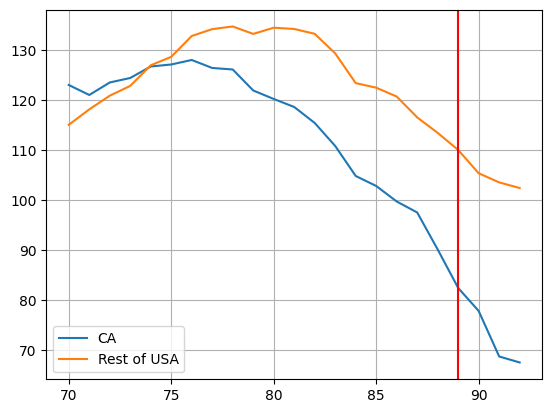

In [22]:
from matplotlib import pyplot as plt
plt.plot(year, ca_sales, label="CA")
plt.plot(year, rest_sales, label="Rest of USA")
plt.grid()
plt.axvline(x=89, color='r')
plt.legend()
plt.show()

### log

In [ ]:
Cigar_dis_sum_log = Cigar_dis_sum
Cigar_dis_sum_log

In [ ]:
import math
Cigar_dis_sum_log["log_sales"] = Cigar_dis_sum_log["sales"].apply(lambda x: math.log(x))
Cigar_dis_sum_log

In [114]:
# define your independent and dependent variables
X = Cigar_dis_sum_log[['ca', 'post', 'confounding_ca_post','year_dummy']]
X = pd.get_dummies(X, drop_first=True)

Y = Cigar_dis_sum_log["log_sales"] 

# add an intercept to the independent variables
X = sm.add_constant(X)

# create a linear regression model and fit it to the data
model = sm.OLS(Y, X).fit()

# print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     14.79
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.97e-08
Time:                        17:04:38   Log-Likelihood:                 83.756
No. Observations:                  46   AIC:                            -117.5
Df Residuals:                      21   BIC:                            -71.80
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.8171    

## 

# Casual Impact

In [ ]:
!pip install pycausalimpact
from causalimpact import CausalImpact ##CausalImpactのライブラリ
%matplotlib inline

## https://www.lifull.blog/entry/2020/04/20/114200

In [ ]:
Y = data[data["state"]==5][["year","sales"]]
Y

In [ ]:
#　X_sales　は間違ったもの。
X_sales = data[(data["state"]!=5)][["state", "sales", "year"]].pivot(index= "year",columns="state",values="sales")

#　X_sales_2 が正しいもの。
X_sales_2 = data[(~data["state"].isin(skip_state) ) ] [["state", "sales", "year"]].pivot(index= "year",columns="state",values="sales")
X_sales_2


## X_sales_2 正しいもの（skip_stateを抜いた）




In [ ]:
X_sales_2 = X_sales_2.reset_index()
X_sales_2[X_sales_2["year"]>=88]

<Axes: xlabel='year'>

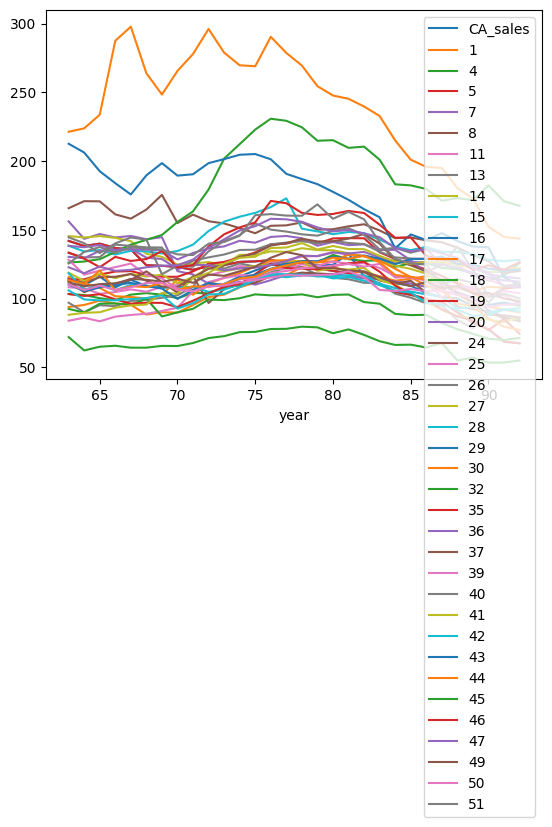

In [103]:
CI_data_2 = pd.merge(Y, X_sales_2, on="year",how="left").rename(columns={"sales":'CA_sales'})
CI_data_2 = CI_data_2.set_index("year")
CI_data_@.plot()

In [105]:
# 1963~に絞り込む

CI_data_2.index = CI_data_2.index.astype(str)
CI_data_2_limited = CI_data_2.loc['70':'92']

# indexをintに直す
CI_data_2_limited.index = CI_data_2_limited.index.astype(int)
CI_data_2_limited

#columnはstrで統一する
CI_data_2_limited.columns = CI_data_2_limited.columns.astype(str)

#期間を絞り込む
pre_period_list  = [70,87]
post_period_list = [88,92]

In [ ]:
CI_data_2_limited

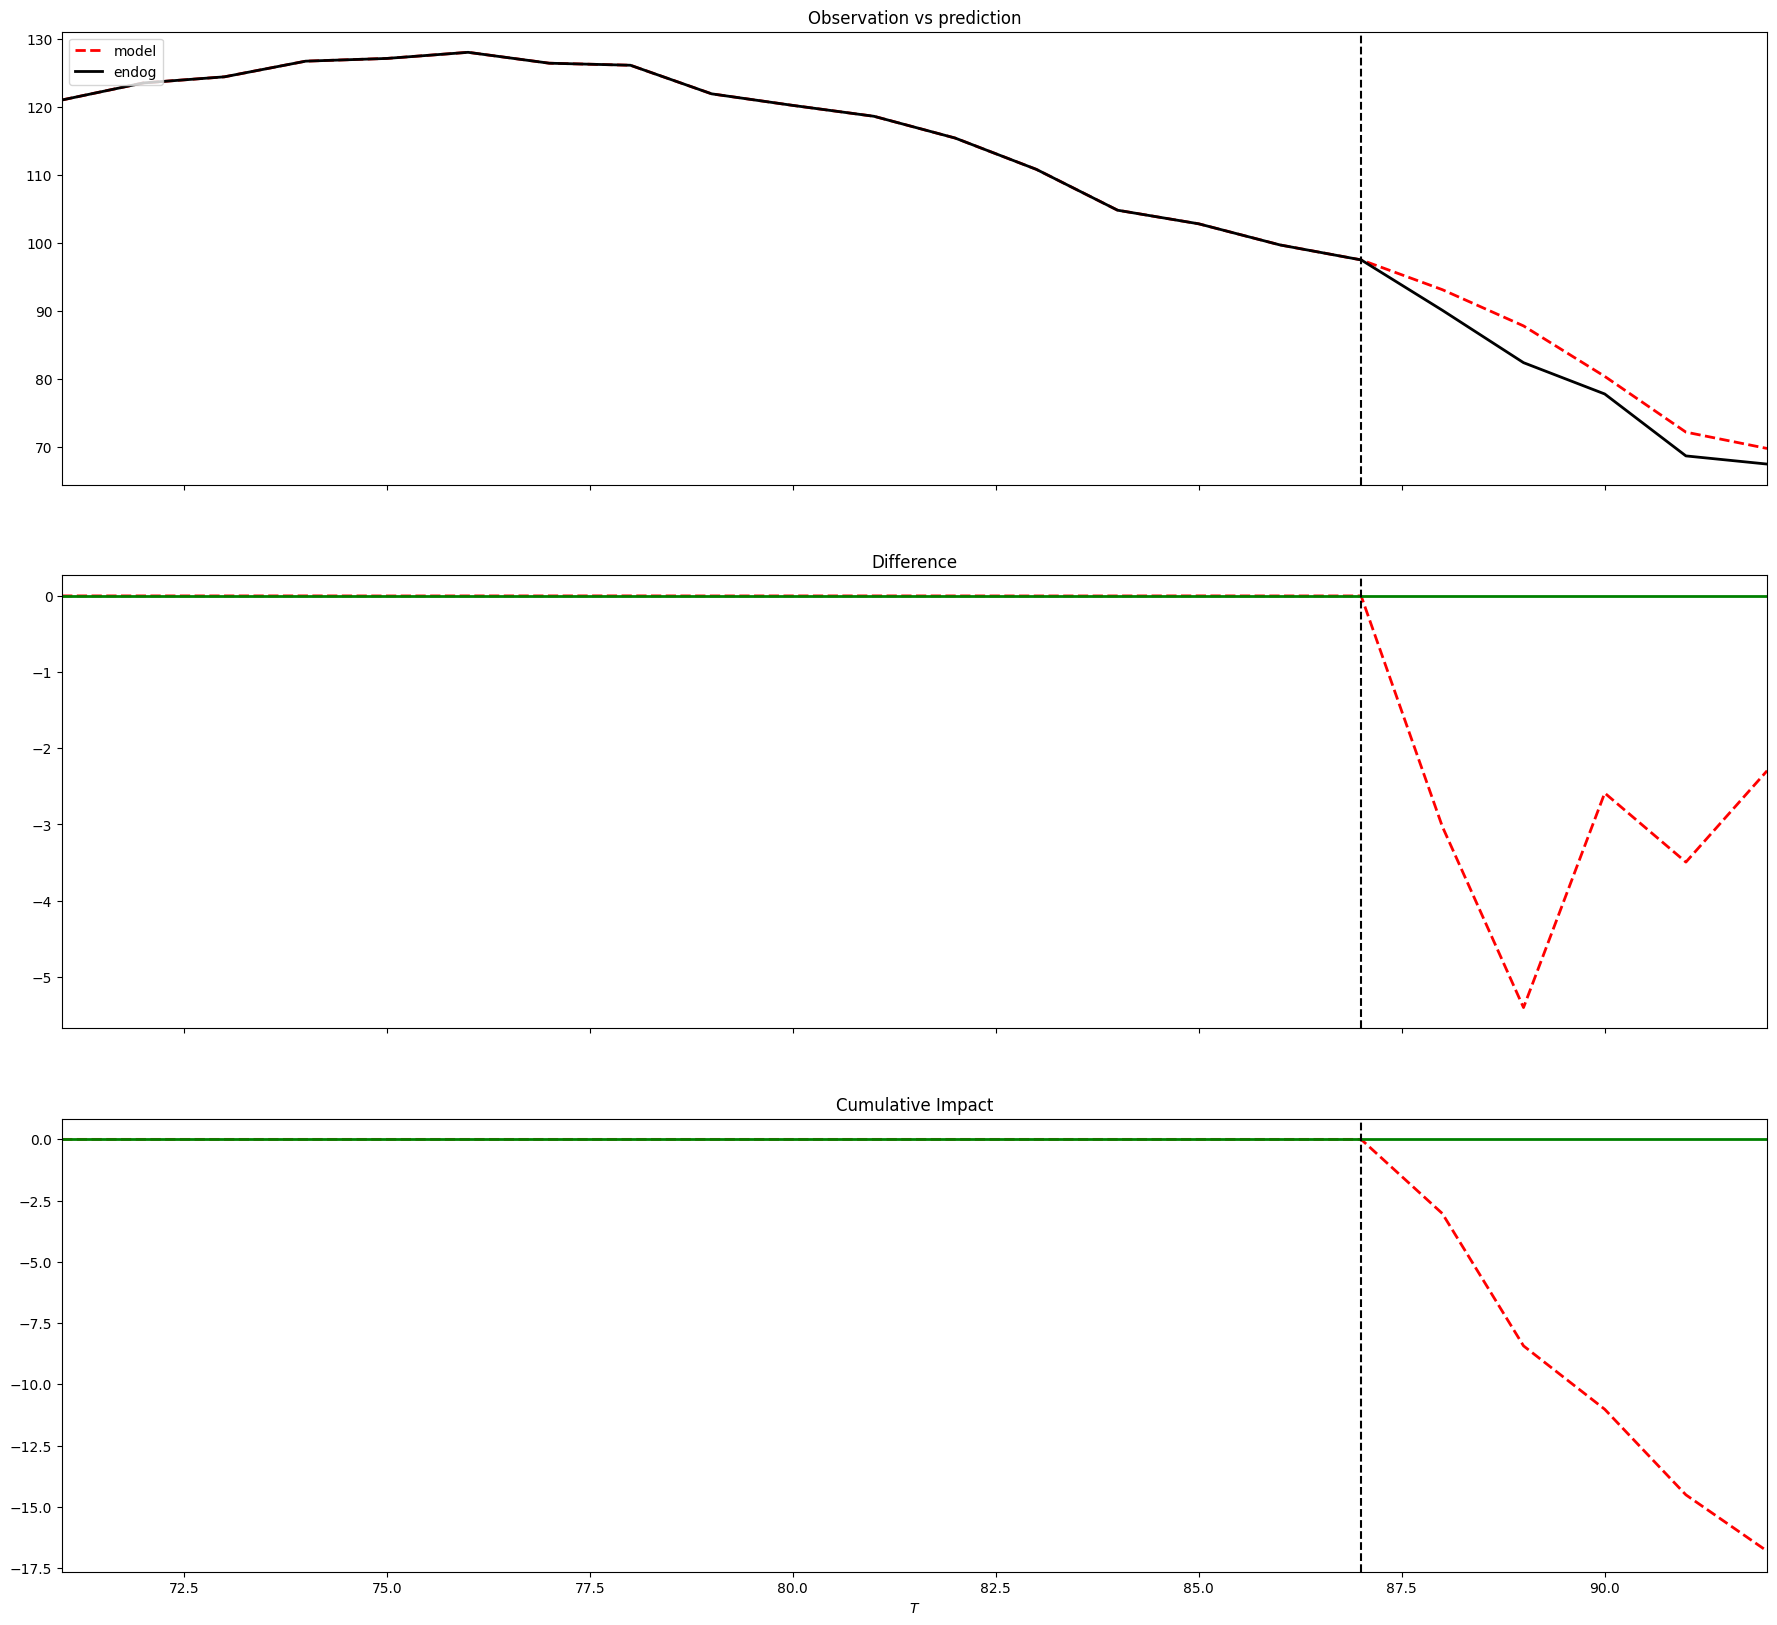

In [113]:
ci2 = CausalImpact(CI_data_2_limited, pre_period_list, post_period_list)
ci2.run()
ci2.plot(figsize=(22, 20))

# 値、グラフともに異なっており、このライブラリが使っているstatsmodelsのカルマンフィルターは確定的であり、
# RのCausalImpactで用いる確率的なカルマンフィルターと違うため、らしいです。
# https://esu-ko.hatenablog.com/entry/2020/08/13/Python%E3%81%A7%E5%9B%A0%E6%9E%9C%E6%8E%A8%E8%AB%96%E3%81%97%E3%81%9F%E3%81%84%28CausalImpact%29

## X_salesは間違ったもの（skip_stateを含む）

In [ ]:
pre_period  = X_sales.loc[:87]
post_period = X_sales.loc[88:]
pre_period

In [30]:
X_sales = X_sales.reset_index()
X_sales[X_sales["year"]>=88]

state,year,1,3,4,7,8,9,10,11,13,...,42,43,44,45,46,47,48,49,50,51
25,88,112.1,102.2,121.5,104.8,137.1,105.4,119.5,124.1,84.5,...,91.9,125.3,96.5,55.0,128.7,129.5,88.2,109.1,102.6,114.3
26,89,105.6,96.8,118.3,100.6,131.7,101.1,113.8,117.1,78.4,...,87.4,124.7,94.5,57.0,120.9,122.5,86.1,104.0,100.3,111.4
27,90,108.6,88.9,113.1,91.5,127.2,84.1,110.1,113.8,90.1,...,88.3,121.8,85.6,53.4,124.3,118.9,83.4,104.1,94.1,96.9
28,91,107.9,81.2,116.8,86.7,118.8,82.2,98.2,109.6,85.4,...,91.8,120.6,79.6,53.5,120.9,109.1,78.7,100.1,95.5,109.1
29,92,109.1,79.0,126.0,83.6,120.0,82.6,95.9,109.2,85.1,...,93.0,121.0,77.2,55.0,126.5,108.2,81.1,98.0,96.2,110.8


In [ ]:
CI_data = pd.merge(Y, X_sales, on="year",how="left").rename(columns={"sales":'CA_sales'})
CI_data = CI_data.set_index("year")
CI_data.plot()

In [55]:
display(CI_data.head(2))
display(CI_data.tail(2))

,CA_sales,1,3,4,7,8,9,10,11,13,...,42,43,44,45,46,47,48,49,50,51
year,,,,,,,,,,,,,,,,,,,,,
63,142.0,93.9,125.0,103.4,156.2,165.8,246.4,137.5,108.3,97.0,...,106.0,110.3,113.4,72.0,133.5,122.8,99.1,111.8,110.4,125.6
64,138.3,95.4,121.0,102.6,143.5,170.9,235.3,125.5,107.6,90.1,...,99.4,105.5,110.7,62.3,129.1,118.5,95.4,109.0,106.2,134.0


,CA_sales,1,3,4,7,8,9,10,11,13,...,42,43,44,45,46,47,48,49,50,51
year,,,,,,,,,,,,,,,,,,,,,
91,68.7,107.9,81.2,116.8,86.7,118.8,82.2,98.2,109.6,85.4,...,91.8,120.6,79.6,53.5,120.9,109.1,78.7,100.1,95.5,109.1
92,67.5,109.1,79.0,126.0,83.6,120.0,82.6,95.9,109.2,85.1,...,93.0,121.0,77.2,55.0,126.5,108.2,81.1,98.0,96.2,110.8


In [89]:
# 1963~に絞り込む

CI_data.index = CI_data.index.astype(str)
CI_data_limited = CI_data.loc['70':'92']

# indexをintに直す
CI_data_limited.index = CI_data_limited.index.astype(int)
CI_data_limited

#columnはstrで統一する
CI_data_limited.columns = CI_data_limited.columns.astype(str)



In [90]:
#期間を絞り込む
pre_period_list  = [70,87]
post_period_list = [88,92]

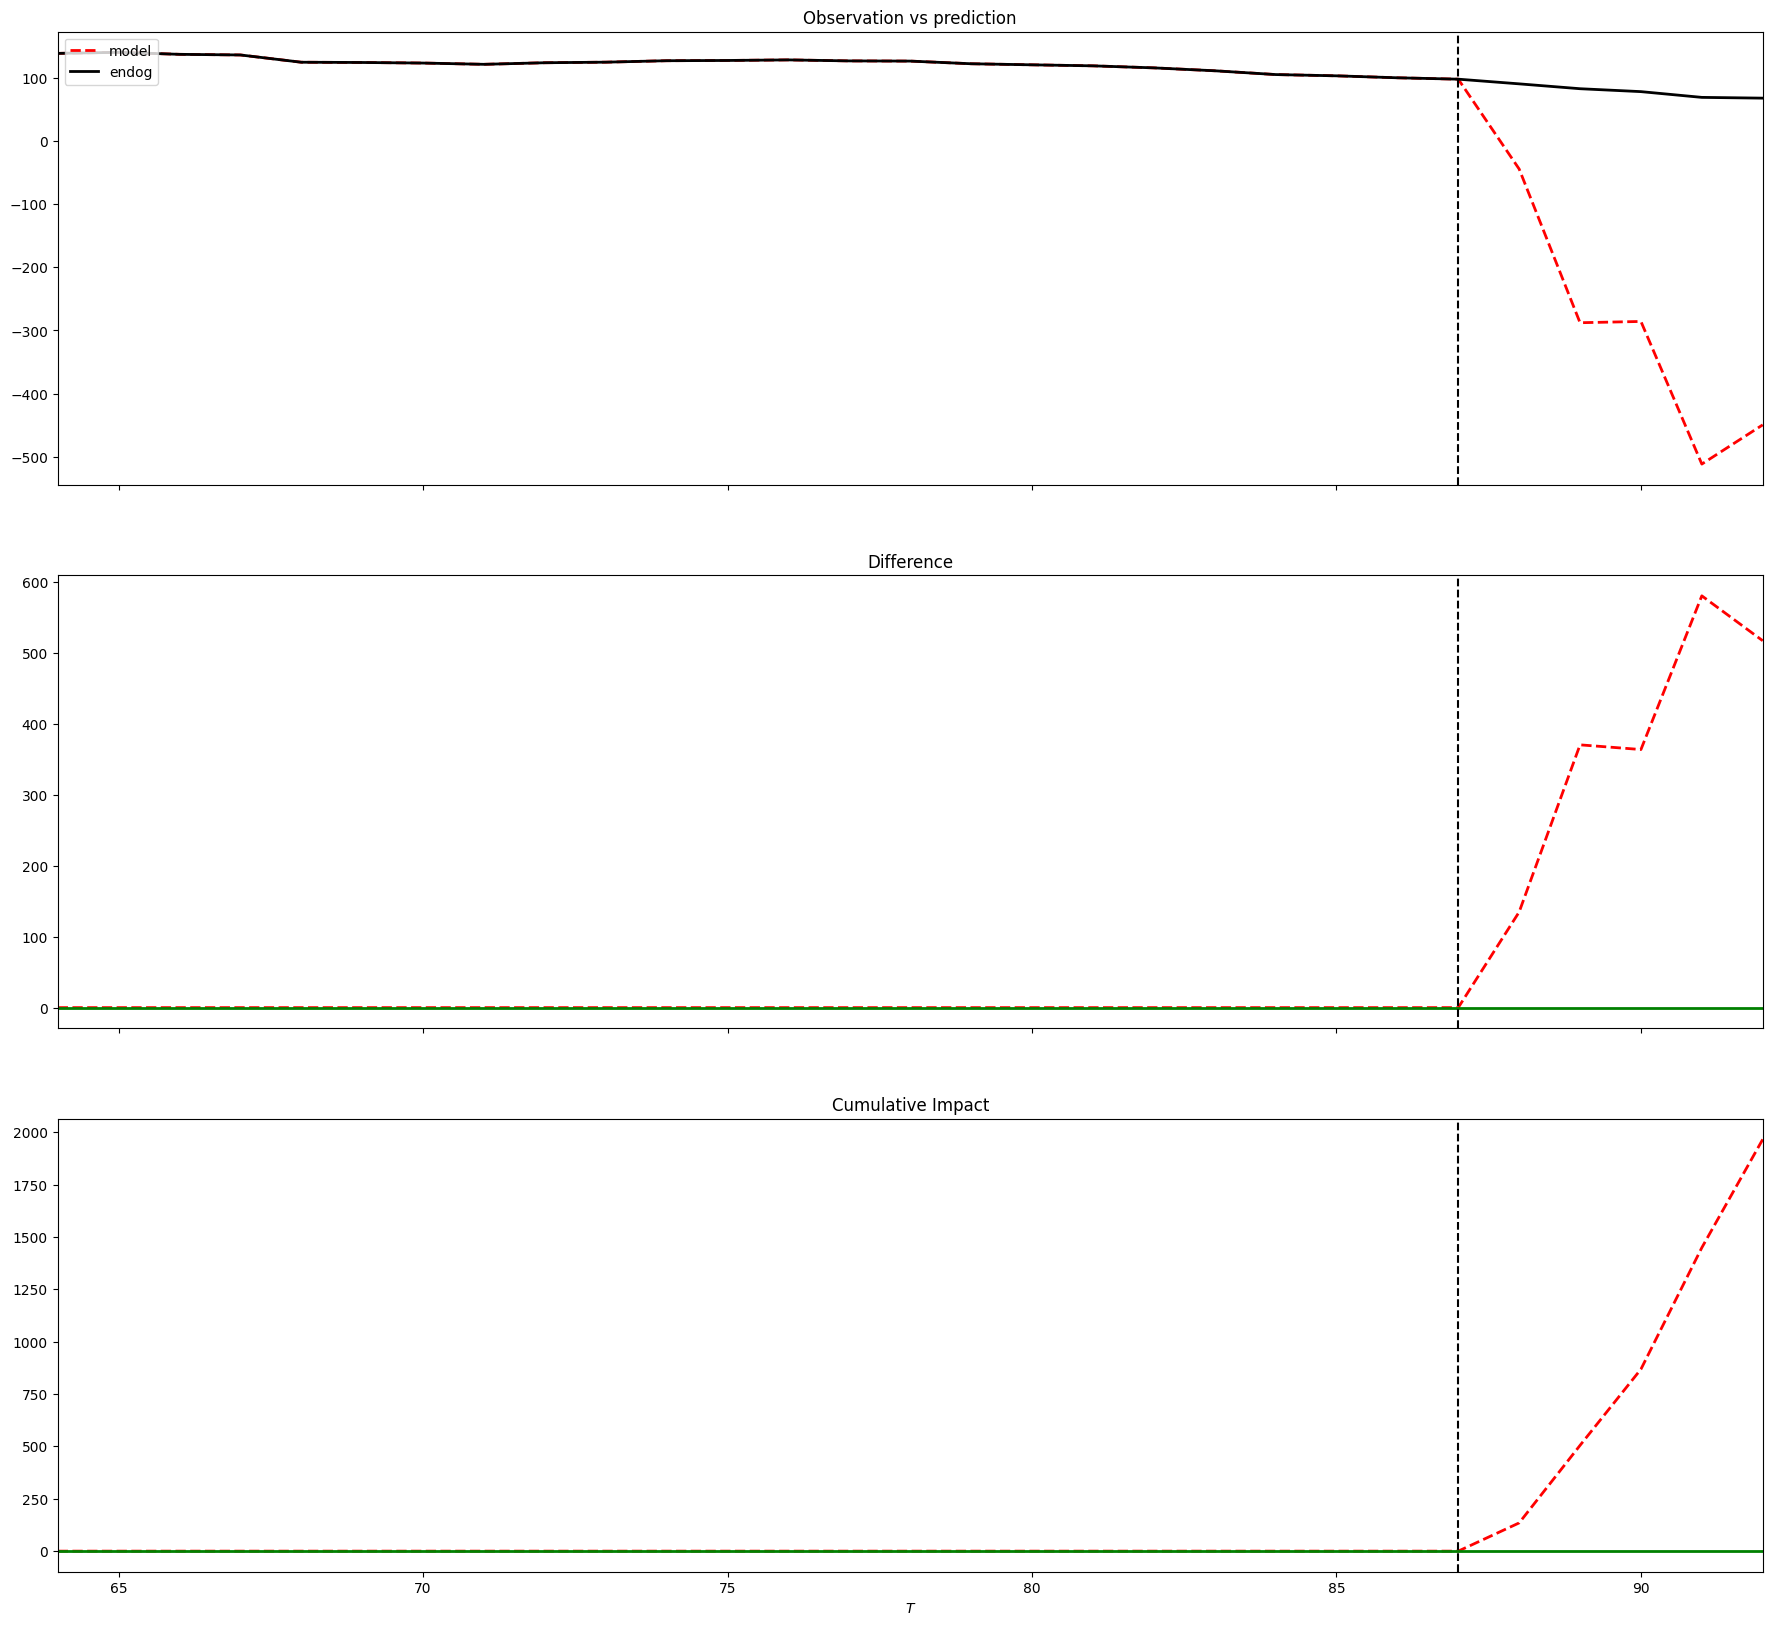

In [88]:
ci = CausalImpact(CI_data_limited, pre_period_list, post_period_list)
ci.run()
ci.plot(figsize=(22, 20))